In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
x_original=pd.read_csv('../XLable_onlyDiabeticRemoved.txt')
y_original=pd.read_csv('../TargetLable_onlyDiabeticRemoved.txt')

y_original=y_original[['Unnamed: 0','L104600']]

data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')

In [3]:
# data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')

#combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])
print(data.shape)


(185843, 407)


In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(169024, 407)


In [5]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [14]:
corr=data[numerical_cols].corr()
corr=corr.L104600_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
152,L501900,1.000000
277,L104600_y,1.000000
271,S008502,0.848730
70,L122000,0.808773
256,S004413,0.806339


In [7]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,169024
1,index,169024
2,COMPARE,169024
3,AGE,169024
4,SEX,169024


In [26]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>100000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
8,L100800,0.550335,168874
16,S000300,0.247528,168710
17,L103300,0.242204,143521
21,AGE,0.219957,169024
23,L103000,0.204008,168575
25,L102900,0.186907,168577
27,L101300,0.179171,168885
31,S000501,0.153878,168945
32,L101700,0.153532,168587
33,L103200,0.149182,168511


In [28]:
print(list(mergedColCorrCount.head(22).Col))

['L100800', 'S000300', 'L103300', 'AGE', 'L103000', 'L102900', 'L101300', 'S000501', 'L101700', 'L103200', 'S000502', 'L190000', 'L103100', 'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 'L504700', 'L190500', 'L100400', 'L191000']


Anova test - For categorical values [Questionnaire answers]
=======

In [29]:
mydataset=data.copy()[categorical_cols] 

mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [30]:
colslist=mydataset.columns
DiabeticColVals=data.L104600_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [31]:

FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [32]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(30)

,Cols,F,P,Count
23,FIELD_33,245.996461,8.966245e-159,67420
21,FIELD_31,193.892381,5.172479e-44,67535
11,FIELD_21,69.075415,9.650605e-17,67535
17,FIELD_27,37.254966,1.042129e-09,67535
4,FIELD_14,24.315436,2.778055e-11,67530
18,FIELD_28,13.539339,2.337961e-04,67535
29,FIELD_40,10.969137,6.343895e-14,67418
30,FIELD_41,7.971815,1.043449e-09,67406
1,FIELD_4,4.805742,2.017349e-05,66452
22,FIELD_32,4.728681,2.545913e-04,67338


In [33]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_31', 'FIELD_21', 'FIELD_27', 'FIELD_14', 'FIELD_28', 'FIELD_40', 'FIELD_41', 'FIELD_4', 'FIELD_32']


correlation for categorical values
============

In [36]:
mydata=data[['L104600_y','L100800', 'S000300', 'L103300', 'AGE', 'L103000', 'L102900', 'L101300', 'S000501', 'L101700', 
             'L103200', 'S000502', 'L190000', 'L103100', 'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 
             'L504700', 'L190500', 'L100400', 'L191000','FIELD_33', 'FIELD_31', 'FIELD_21', 'FIELD_27', 
             'FIELD_14', 'FIELD_28', 'FIELD_40', 'FIELD_41', 'FIELD_4', 'FIELD_32']].dropna()

mydata=mydata.drop(mydata[mydata.FIELD_4=='.'].index)
 

x=mydata[['L100800', 'S000300', 'L103300', 'AGE', 'L103000', 'L102900', 'L101300', 'S000501', 'L101700', 
             'L103200', 'S000502', 'L190000', 'L103100', 'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 
             'L504700', 'L190500', 'L100400', 'L191000','FIELD_33', 'FIELD_31', 'FIELD_21', 'FIELD_27', 
             'FIELD_14', 'FIELD_28', 'FIELD_40', 'FIELD_41', 'FIELD_4', 'FIELD_32']]

y=mydata[['L104600_y']]

In [47]:
# # from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:10]))

# 'L100800', 'S000300', 'AGE', 'L101300', 'S000501', 'L101700', 'S000502', 'L190000', 'L101600', 'L190300', 'SEX', 'L101200'

['L100800', 'S000300', 'AGE', 'L101300', 'S000501', 'L101700', 'S000502', 'L190000', 'L101600', 'L190300']


[0.36763356 0.04960438 0.06128482 0.03197496 0.02663692 0.02743305
 0.02853883 0.03530498 0.03030159 0.0319784  0.01036837 0.02997232
 0.03362484 0.03048838 0.0295544  0.03496062 0.01689175 0.01295125
 0.0009356  0.00837351 0.00133218 0.00753511 0.02387725 0.02454055
 0.02421866 0.01968373]


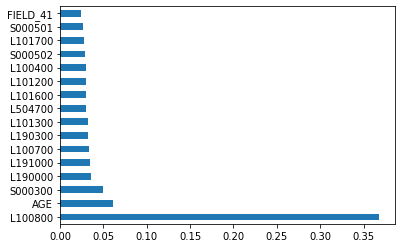

Index(['L100800', 'AGE', 'S000300', 'L190000', 'L191000', 'L100700', 'L190300',
       'L101300', 'L504700', 'L101600', 'L101200', 'L100400'],
      dtype='object')


In [48]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(12).index)

In [ ]:
# import seaborn as sns
# temppd=pd.DataFrame(data[['L104600', 'L100800', 'L103300', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 
#                           'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L190300', 
#                           'L504700', 'L101100', 'L100400', 'SEX','FIELD_31', 'FIELD_33', 'FIELD_21', 'FIELD_27', 
#                           'FIELD_14', 'FIELD_28', 'FIELD_38', 'FIELD_4', 'FIELD_18', 'FIELD_29']]).dropna()  
# temppd['y']=data.L104600
 

# corr = (temppd.corr())
# sns.heatmap(corr, vmin=-1, vmax=1) 

# corr.head(20)

In [42]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(mydata,'L104600_y')
print(newcols)

0 ,  L100800  VIF =  1.3
1 ,  S000300  VIF =  1.64
2 ,  L103300  VIF =  15.32
3 ,  AGE  VIF =  1.33
4 ,  L103000  VIF =  21.07
5 ,  L102900  VIF =  96.82
6 ,  L101300  VIF =  3.22
7 ,  S000501  VIF =  2.77
8 ,  L101700  VIF =  1.53
9 ,  L103200  VIF =  76.1
10 ,  S000502  VIF =  2.55
11 ,  L190000  VIF =  1.29
12 ,  L103100  VIF =  22.39
13 ,  L101600  VIF =  1.22
14 ,  L190300  VIF =  4.92
15 ,  SEX  VIF =  3.45
16 ,  L101200  VIF =  2.72
17 ,  L100700  VIF =  1.95
18 ,  L504700  VIF =  1.21
19 ,  L190500  VIF =  5.58
20 ,  L100400  VIF =  1.17
21 ,  L191000  VIF =  1.19
22 ,  FIELD_33  VIF =  1.71
23 ,  FIELD_31  VIF =  1.01
24 ,  FIELD_21  VIF =  2.79
25 ,  FIELD_27  VIF =  1.02
26 ,  FIELD_14  VIF =  2.78
27 ,  FIELD_28  VIF =  1.01
28 ,  FIELD_40  VIF =  1.6
29 ,  FIELD_41  VIF =  1.57
30 ,  FIELD_4  VIF =  1.02
31 ,  FIELD_32  VIF =  1.02
['L100800', 'S000300', 'AGE', 'L101300', 'S000501', 'L101700', 'S000502', 'L190000', 'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 'L50470

In [43]:
mydata=data[['L104600_y','L100800', 'S000300', 'AGE', 'L101300', 'S000501', 'L101700', 'S000502', 'L190000', 
             'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 'L504700', 'L100400', 'L191000', 'FIELD_33', 
             'FIELD_31', 'FIELD_21', 'FIELD_27', 'FIELD_14', 'FIELD_28', 'FIELD_40', 'FIELD_41', 
             'FIELD_4', 'FIELD_32']].dropna()

x=mydata[['L100800', 'S000300', 'AGE', 'L101300', 'S000501', 'L101700', 'S000502', 'L190000', 
             'L101600', 'L190300', 'SEX', 'L101200', 'L100700', 'L504700', 'L100400', 'L191000', 'FIELD_33', 
             'FIELD_31', 'FIELD_21', 'FIELD_27', 'FIELD_14', 'FIELD_28', 'FIELD_40', 'FIELD_41', 
             'FIELD_4', 'FIELD_32']]

y=mydata[['L104600_y']]